<a href="https://colab.research.google.com/github/bhavi289/DL-GANs/blob/master/DL_Assign2_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q tensorflow-gpu==2.0.0-alpha0
import tensorflow as tf

    100% |████████████████████████████████| 332.1MB 61kB/s 
    100% |████████████████████████████████| 419kB 9.8MB/s 
    100% |████████████████████████████████| 61kB 21.7MB/s 
    100% |████████████████████████████████| 3.0MB 6.3MB/s 


In [0]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf

In [7]:
tf.__version__

'2.0.0-alpha0'

In [47]:
# Load the Drive helper and mount
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
import os
from sklearn.model_selection import train_test_split
import tensorflow.keras.layers as layers # Keras layers API
import tensorflow.keras.models as models # Keras layers API
import tensorflow.keras.optimizers as Adam # Keras layers API


from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
dataset_path = 'drive/My Drive/DL Assign2 GAN Dataset/faces94/'

In [0]:
import PIL
flag = 0
# X, y = '', ''
X = []
i = 0
for root, directories, files in os.walk(dataset_path):
#   print (f"{root}\n\n, Here{_}\n\n, {files}\n")
  
  for file in files:
    try:
        file_path = root + '/' + file
#         print (file_path)
        extension_list = ['jpg', 'jpeg', 'png', 'svg']
        i += 1
        if (file_path.split('.')[-1] in extension_list):
#           X.append(file_path)
        # class is dependent variable. Taken from folder name where images are kept
        # ground_truth = int(file_path.strip().split('/')[-2]) -1
          
          img = PIL.Image.open( file_path )
          img = img.resize((128, 128))
          img.load()
          image = np.asarray( img, dtype="int32" )
          
#           print (file_path)
#           im = matplotlib.pyplot.imread(file_path)
#           image = np.array(im)
          if flag == 0:
            flag = 1
            X = np.array([image])
          else:
            X = np.append(X, [image], axis=0)
    except Exception as e:
        print (e)   
        pass

# data, labels = np.arange(10).reshape((5, 2)), range(5)
# data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.20, random_state=42)

# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print ("success")
print (len(X))

In [0]:
# Helper function to load image
import PIL
def load_image( infilename ) :
    img = PIL.Image.open( infilename )
#     print ((img))
#     print (np.array(img).shape)
#     img = img.resize((64,64))
    img.load()
    data = np.asarray( img, dtype="int32" )
    return data

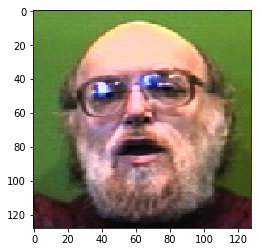

In [12]:

plt.imshow((X[3000]), interpolation='nearest')
plt.show()

In [14]:
 X.shape

(3059, 128, 128, 3)

In [0]:
from sklearn import preprocessing
X_train = X/255
# print (X_train)

In [79]:
X_train.shape

(3059, 128, 128, 3)

In [0]:
input_img = layers.Input(shape=(128, 128, 3))

x = layers.Conv2D(8, (5, 5), strides=2, padding='same')(input_img)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

# x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (5, 5), strides=2, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

# x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (5, 5), strides=2, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

x = layers.Conv2D(64, (5, 5), strides=2, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

x = layers.Conv2D(100, (4, 4), strides=2, padding='same')(x)
x = layers.BatchNormalization()(x)
encoded = layers.Activation('relu')(x)

# encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2DTranspose(64, (4, 4), padding='same')(encoded)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

# x = layers.UpSampling2D((2, 2))(x) 
x = layers.Conv2DTranspose(32, (6, 6), strides=2,padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

# x = layers.UpSampling2D((2, 2))(x) 
x = layers.Conv2DTranspose(16, (6, 6), strides=2,padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

# x = layers.UpSampling2D((2, 2))(x) 
x = layers.Conv2DTranspose(8, (7, 7), strides=2,padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

# x = layers.UpSampling2D((2, 2))(x) 
x = layers.Conv2DTranspose(8, (7, 7), strides=2,padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

# x = layers.UpSampling2D((2, 2))(x) 
x = layers.Conv2DTranspose(3, (8, 8), strides=2,padding='same')(x)
decoded = layers.BatchNormalization()(x)
# decoded = layers.Activation('relu')(x)

# x = layers.UpSampling2D((2, 2))(x)
# x = layers.Conv2D(64, (3, 3), padding='same')(x)
# x = layers.BatchNormalization()(x)
# x = layers.Activation('relu')(x)
# x = layers.UpSampling2D((2, 2))(x)
# x = layers.Conv2D(3, (3, 3), padding='same')(x)
# x = layers.BatchNormalization()(x)
# decoded = layers.Activation('sigmoid')(x)

In [0]:
model = models.Model(input_img, decoded)
model.compile(optimizer='adam', loss='mean_squared_error')

In [82]:
X.shape

(3059, 128, 128, 3)

In [83]:
X_train.shape

(3059, 128, 128, 3)

In [84]:
model.fit(X_train, X_train,
          epochs=50,
          batch_size=32,
          shuffle=True,
          )

Epoch 1/50
3059/3059 [==============================] - 7s 2ms/sample - loss: 0.7536
Epoch 2/50
3059/3059 [==============================] - 6s 2ms/sample - loss: 0.5058
Epoch 3/50
3059/3059 [==============================] - 6s 2ms/sample - loss: 0.3686
Epoch 4/50
3059/3059 [==============================] - 7s 2ms/sample - loss: 0.2683
Epoch 5/50
3059/3059 [==============================] - 7s 2ms/sample - loss: 0.1937
Epoch 6/50
3059/3059 [==============================] - 7s 2ms/sample - loss: 0.1388
Epoch 7/50
3059/3059 [==============================] - 6s 2ms/sample - loss: 0.0981
Epoch 8/50
3059/3059 [==============================] - 7s 2ms/sample - loss: 0.0685
Epoch 9/50
3059/3059 [==============================] - 7s 2ms/sample - loss: 0.0470
Epoch 10/50
3059/3059 [==============================] - 7s 2ms/sample - loss: 0.0322
Epoch 11/50
3059/3059 [==============================] - 7s 2ms/sample - loss: 0.0219
Epoch 12/50
3059/3059 [==============================] - 7s 2ms

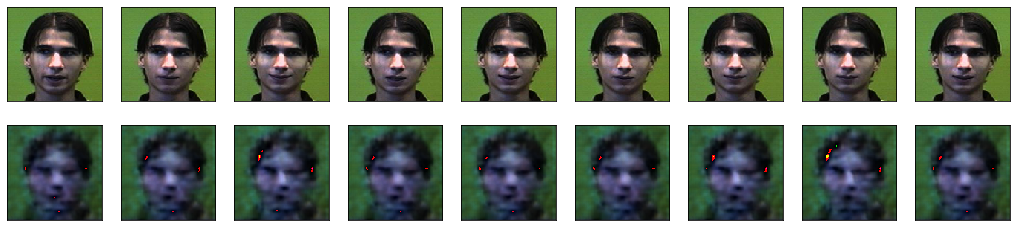

In [85]:
decoded_imgs = model.predict(X)

# decoded_imgs[0]

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(X_train[i].reshape(128, 128, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow((decoded_imgs[i]).reshape(128, 128, 3).astype(np.uint8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [86]:
print (decoded_imgs[0])

[[[28.564135 57.27776  28.460331]
  [37.430794 69.39281  39.219738]
  [44.362907 79.97864  40.880238]
  ...
  [50.04835  80.510994 37.713856]
  [43.832123 75.29429  37.96984 ]
  [39.357513 63.856155 29.09084 ]]

 [[33.928963 66.5785   41.115955]
  [43.058132 78.33795  45.053177]
  [49.23128  92.750046 54.686253]
  ...
  [53.341335 90.316605 53.861317]
  [49.838177 83.98227  50.34213 ]
  [45.38831  73.57471  40.002422]]

 [[32.510033 66.78409  45.51173 ]
  [44.169167 82.228455 54.270977]
  [51.586765 95.14211  66.10867 ]
  ...
  [54.07653  94.720024 62.13114 ]
  [52.888153 88.001114 55.866665]
  [43.843197 75.09985  42.48053 ]]

 ...

 [[29.732843 48.56268  31.256807]
  [38.67237  62.55615  47.184036]
  [41.448208 66.655785 51.4586  ]
  ...
  [50.7284   69.473816 53.575718]
  [45.156715 60.842857 50.69422 ]
  [41.839317 52.671345 42.3987  ]]

 [[30.085655 44.272774 33.390713]
  [37.576164 54.44056  43.54401 ]
  [42.764282 60.604984 50.256474]
  ...
  [50.87742  62.688503 55.765663]
  [4

In [0]:
# input_img = layers.Input(shape=(128, 128, 3))
# x = layers.Conv2D(64, (3, 3), padding='same')(input_img)
# x = layers.BatchNormalization()(x)
# x = layers.Activation('relu')(x)
# x = layers.MaxPooling2D((2, 2), padding='same')(x)
# x = layers.Conv2D(32, (3, 3), padding='same')(x)
# x = layers.BatchNormalization()(x)
# x = layers.Activation('relu')(x)
# x = layers.MaxPooling2D((2, 2), padding='same')(x)
# x = layers.Conv2D(16, (3, 3), padding='same')(x)
# x = layers.BatchNormalization()(x)
# x = layers.Activation('relu')(x)
# encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# x = layers.Conv2D(16, (3, 3), padding='same')(encoded)
# x = layers.BatchNormalization()(x)
# x = layers.Activation('relu')(x)
# x = layers.UpSampling2D((2, 2))(x)
# x = layers.Conv2D(32, (3, 3), padding='same')(x)
# x = layers.BatchNormalization()(x)
# x = layers.Activation('relu')(x)
# x = layers.UpSampling2D((2, 2))(x)
# x = layers.Conv2D(64, (3, 3), padding='same')(x)
# x = layers.BatchNormalization()(x)
# x = layers.Activation('relu')(x)
# x = layers.UpSampling2D((2, 2))(x)
# x = layers.Conv2D(3, (3, 3), padding='same')(x)
# x = layers.BatchNormalization()(x)
# decoded = layers.Activation('sigmoid')(x)

In [0]:
# batch_size = 32
# num_classes = 10
# epochs = 100

In [0]:
# history = model.fit(X, X,
#                     batch_size=batch_size,
#                     epochs=epochs,
#                     verbose=1,
#                     shuffle=True)

# ** -----------------------------------**

In [0]:
x_train = X.reshape((len(X), np.prod(X.shape[1:])))

In [0]:
x_train.shape

(3059, 49152)

In [0]:
X.shape

(3059, 28, 28, 3)

In [0]:
# print(X[0])
X_Train = X.astype('float32') / 255

print(X_Train.shape)
X_Train = np.reshape(X_Train, (len(X_Train), 28, 28, 3))
print(X_Train.shape)
print(X[0])
print("***")
print(X_Train[0])



In [0]:
# from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
# from keras.models import Model
# from keras import backend as K

input_img = layers.Input(shape=(28, 28, 3))  # adapt this if using `channels_first` image data format

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='relu', padding='same')(x)

autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

In [0]:
autoencoder.fit(X, X,
                epochs=50,
                batch_size=128,
                shuffle=True,
                )

Epoch 1/50
3059/3059 [==============================] - 0s 156us/sample - loss: 10756.3322
Epoch 2/50
3059/3059 [==============================] - 0s 116us/sample - loss: 10748.4493
Epoch 3/50
3059/3059 [==============================] - 0s 114us/sample - loss: 10739.9255
Epoch 4/50
3059/3059 [==============================] - 0s 116us/sample - loss: 10730.7548
Epoch 5/50
3059/3059 [==============================] - 0s 113us/sample - loss: 10720.8900
Epoch 6/50
3059/3059 [==============================] - 0s 113us/sample - loss: 10710.2910
Epoch 7/50
3059/3059 [==============================] - 0s 113us/sample - loss: 10698.8848
Epoch 8/50
3059/3059 [==============================] - 0s 111us/sample - loss: 10686.6103
Epoch 9/50
3059/3059 [==============================] - 0s 113us/sample - loss: 10673.3901
Epoch 10/50
3059/3059 [==============================] - 0s 113us/sample - loss: 10659.1381
Epoch 11/50
3059/3059 [==============================] - 0s 109us/sample - loss: 10643.75

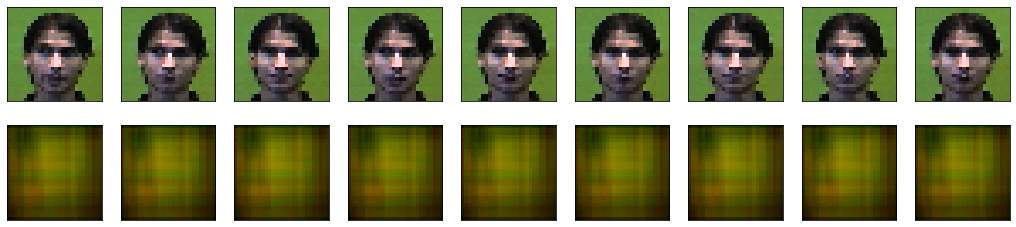

In [0]:
decoded_imgs = autoencoder.predict(X)

# decoded_imgs[0]

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(X_Train[i].reshape(28, 28, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow((decoded_imgs[i]).reshape(28, 28, 3).astype(np.uint8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
print ((decoded_imgs[0]).astype(np.uint8))
print (X_Train[0]*255)

[[[35 17  0]
  [28 45  0]
  [30 40  0]
  ...
  [21 23  0]
  [20 27  0]
  [22 32  0]]

 [[70 41  0]
  [52 62  0]
  [59 52  0]
  ...
  [46 24  0]
  [41 33  0]
  [49 43  0]]

 [[75 41  0]
  [52 63  0]
  [55 53  0]
  ...
  [48 23  0]
  [43 32  0]
  [51 38  0]]

 ...

 [[27 21  0]
  [37 30  0]
  [48 37  0]
  ...
  [41 26  0]
  [38 26  0]
  [24 21  0]]

 [[24 23  0]
  [37 30  0]
  [52 36  0]
  ...
  [39 29  0]
  [36 29  0]
  [23 24  0]]

 [[ 9  6  0]
  [26 12  0]
  [34 14  0]
  ...
  [30 17  0]
  [25 17  0]
  [16 13  0]]]
[[[ 96. 141.  60.]
  [ 96. 141.  60.]
  [ 93. 137.  58.]
  ...
  [103. 147.  60.]
  [102. 146.  59.]
  [104. 144.  55.]]

 [[100. 145.  64.]
  [ 99. 144.  63.]
  [ 98. 142.  67.]
  ...
  [102. 146.  59.]
  [106. 150.  63.]
  [104. 144.  58.]]

 [[ 97. 141.  62.]
  [ 96. 140.  61.]
  [100. 145.  62.]
  ...
  [104. 149.  58.]
  [105. 150.  59.]
  [102. 146.  59.]]

 ...

 [[ 91. 132.  56.]
  [ 93. 134.  58.]
  [ 97. 136.  57.]
  ...
  [ 99. 127.  40.]
  [ 99. 127.  40.]
  [ 9

In [0]:
import glob # The glob module finds all the pathnames matching a specified pattern according to the rules used by the Unix shell, although results are returned in arbitrary order. 
import imageio # Imageio is a Python library that provides an easy interface to read and write a wide range of image data, including animated images, volumetric data, and scientific formats. 
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np
import os # This module provides a portable way of using operating system dependent functionality. 
import PIL # DescriptionPython Imaging Library is a free library for the Python programming language that adds support for opening, manipulating, and saving many different image file formats.
import tensorflow.keras.layers as layers # Keras layers API
import tensorflow.keras.models as models # Keras layers API

import time
from IPython import display # For displaying image

In [0]:
input_img= layers.Input(shape=(49152,))

encoded = layers.Dense(units=128, activation='relu')(input_img)
encoded = layers.Dense(units=64, activation='relu')(encoded)
encoded = layers.Dense(units=32, activation='relu')(encoded)

decoded = layers.Dense(units=64, activation='relu')(encoded)
decoded = layers,Dense(units=128, activation='relu')(decoded)
# decoded = Dense(units=49152, activation='sigmoid')(decoded)
autoencoder = models.Model(input_img, decoded)
encoder = models.Model(input_img, encoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])
autoencoder.fit(X_train_noisy, X_train_noisy,
                epochs=100,
                batch_size=256,
                shuffle=True,
                )
# reconstructing the image from autoencoder and encoder
encoded_imgs = encoder.predict(X_test_noisy)
predicted = autoencoder.predict(X_test_noisy)
# plotting the noised image, encoded image and the reconstructed image
plt.figure(figsize=(40, 4))
for i in range(10):
# display original images
    
    ax = plt.subplot(4, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
# display noised images
    ax = plt.subplot(4, 20, i + 1+20)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
# display encoded images    
    ax = plt.subplot(4, 20, 2*20+i + 1 )
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
# display reconstruction images
    ax = plt.subplot(4, 20, 3*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
plt.show()

NameError: ignored

In [0]:
# from IPython.display import Image, SVG
# import matplotlib.pyplot as plt

# %matplotlib inline

# import numpy as np
# import keras
# from keras.datasets import mnist
# from keras.models import Model, Sequential
# from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
# from keras import regularizers

In [0]:
# input dimension = 108000
input_dim = x_train.shape[1]
encoding_dim = 32

compression_factor = float(input_dim) / encoding_dim
print("Compression factor: %s" % compression_factor)
autoencoder = tf.keras.Sequential()
# autoencoder = Sequential()
autoencoder.add(
    layers.Dense(encoding_dim, input_shape=(input_dim,), activation='relu')
)
autoencoder.add(
    layers.Dense(input_dim, activation='sigmoid')
)

autoencoder.summary()

In [0]:
input_img = layers.Input(shape=(input_dim,))
encoder_layer = autoencoder.layers[0]
encoder = models.Model(input_img, encoder_layer(input_img))

encoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 108000)]          0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                3456032   
Total params: 3,456,032
Trainable params: 3,456,032
Non-trainable params: 0
_________________________________________________________________


In [0]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                )

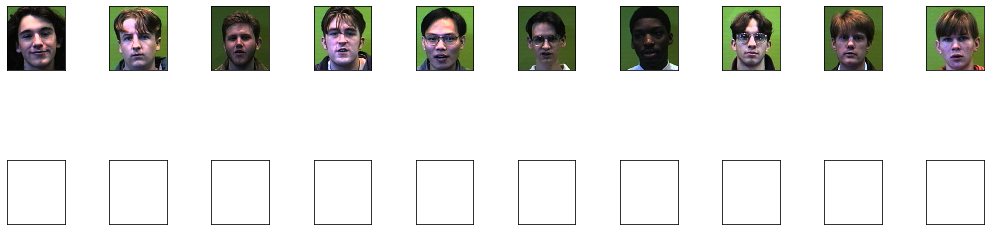

In [0]:
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(x_train.shape[0], size=num_images)

encoded_imgs = encoder.predict(x_train)
decoded_imgs = autoencoder.predict(x_train)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_train[image_idx].reshape(200, 180, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot encoded image
#     ax = plt.subplot(3, num_images, num_images + i + 1)
#     plt.imshow(encoded_imgs[image_idx].reshape(8, 4))
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(200, 180, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
autoencoder = tf.keras.Sequential()

# Encoder Layers
autoencoder.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=X.shape[1:]))
autoencoder.add(layers.MaxPooling2D((2, 2), padding='same'))
autoencoder.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(layers.MaxPooling2D((2, 2), padding='same'))
autoencoder.add(layers.Conv2D(8, (3, 3), strides=(2,2), activation='relu', padding='same'))

# Flatten encoding for visualization
autoencoder.add(layers.Flatten())
autoencoder.add(layers.Reshape((4, 4, 8)))

# Decoder Layers
autoencoder.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(layers.UpSampling2D((2, 2)))
autoencoder.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(layers.UpSampling2D((2, 2)))
autoencoder.add(layers.Conv2D(16, (3, 3), activation='relu'))
autoencoder.add(layers.UpSampling2D((2, 2)))
autoencoder.add(layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

autoencoder.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 28, 28, 16)        448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 4, 4, 8)           584       
_________________________________________________________________
flatten_4 (Flatten)          (None, 128)               0         
_________________________________________________________________
reshape_4 (Reshape)          (None, 4, 4, 8)          

In [0]:
encoder = models.Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('flatten_3').output)
encoder.summary()

In [0]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X, X,
                epochs=100,
                batch_size=128)

# losses.mean_squared_error

ValueError: ignored

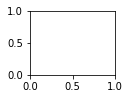

In [0]:
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(X.shape[0], size=num_images)

encoded_imgs = encoder.predict(X)
decoded_imgs = autoencoder.predict(X)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(X[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(16, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()[-1]

name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6750827316
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12806622968358508487
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"

In [0]:
# Helper function to load image
def load_image( infilename ) :
    img = PIL.Image.open( infilename )
#     print ((img))
#     print (np.array(img).shape)
    img = img.resize((64,64))
    img.load()
    data = np.asarray( img, dtype="int32" )
    return data

3059


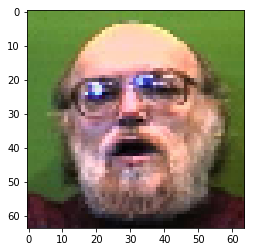

In [0]:
X_backup = X
print (len(X_backup))
plt.imshow(load_image(X[3000]), interpolation='nearest')
plt.show()